## Imports

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
plt.style.use('seaborn-whitegrid')

In [2]:
ROOT_PATH = Path().absolute().parent

In [3]:
basic_result_path = ROOT_PATH.joinpath('data', 'processed', 'test_vocab_results.csv')
adaptive_result_path = ROOT_PATH.joinpath('data', 'processed', 'adaptive_test_vocab_results.csv')

In [4]:
save_path = ROOT_PATH.joinpath('notebooks', 'visuals')

# Model A

In [7]:
a_df = pd.read_csv(adaptive_result_path)
a_df

,model,dataset,voc_size
0,adaptive_11-May-2020_(17:29:25),coco,745.0
1,adaptive_11-May-2020_(17:30:25),coco,795.0
2,adaptive_11-May-2020_(17:31:13),coco,780.0
3,adaptive_11-May-2020_(17:33:25),coco,812.0
4,adaptive_11-May-2020_(17:34:25),coco,746.0
...,...,...,...
70,adaptive_exp_14-May-2020_(14:00:14),c5,766.0
71,adaptive_exp_02-May-2020_(13:49:42),c5,821.0
72,adaptive_exp_16-May-2020_(14:09:52),c5,827.0
73,adaptive_exp_18-May-2020_(07:42:45),c5,752.0


## Baseline

In [8]:
a_baseline_df = a_df.loc[a_df.loc[:,'dataset']=='coco', :]
a_baseline_df

,model,dataset,voc_size
0,adaptive_11-May-2020_(17:29:25),coco,745.0
1,adaptive_11-May-2020_(17:30:25),coco,795.0
2,adaptive_11-May-2020_(17:31:13),coco,780.0
3,adaptive_11-May-2020_(17:33:25),coco,812.0
4,adaptive_11-May-2020_(17:34:25),coco,746.0


In [9]:
a_baseline_df.describe()

,voc_size
count,5.000000
mean,775.600000
std,29.720363
min,745.000000
25%,746.000000
50%,780.000000
75%,795.000000
max,812.000000


In [14]:
c1_a_df = a_df.loc[a_df.loc[:,'dataset']=='c1', :]
c2_a_df = a_df.loc[a_df.loc[:,'dataset']=='c2', :]
c3_a_df = a_df.loc[a_df.loc[:,'dataset']=='c3', :]
c4_a_df = a_df.loc[a_df.loc[:,'dataset']=='c4', :]
c5_a_df = a_df.loc[a_df.loc[:,'dataset']=='c5', :]
cp6_a_df = a_df.loc[a_df.loc[:,'dataset']=='cp6', :]
cp7_a_df = a_df.loc[a_df.loc[:,'dataset']=='cp7', :]
cp8_a_df = a_df.loc[a_df.loc[:,'dataset']=='cp8', :]
cp9_a_df = a_df.loc[a_df.loc[:,'dataset']=='cp9', :]
cp10_a_df = a_df.loc[a_df.loc[:,'dataset']=='cp10', :]
c1p1_a_df = a_df.loc[a_df.loc[:,'dataset']=='c1p1', :]
c2p2_a_df = a_df.loc[a_df.loc[:,'dataset']=='c2p2', :]
c3p3_a_df = a_df.loc[a_df.loc[:,'dataset']=='c3p3', :]
c4p4_a_df = a_df.loc[a_df.loc[:,'dataset']=='c4p4', :]

a_c1_c10_dfs = [c1_a_df, c2_a_df, c3_a_df, c4_a_df, c5_a_df, cp6_a_df, cp7_a_df, cp8_a_df, cp9_a_df, cp10_a_df]
a_c1p1_c5p5_dfs = [c1p1_a_df, c2p2_a_df, c3p3_a_df, c4p4_a_df, cp10_a_df]

In [15]:
a_c1_c10_arrs = np.zeros((2,10))
a_c1p1_c5p5_arrs = np.zeros((2,5))

In [17]:
# fill the arrays
for i, df in enumerate(a_c1_c10_dfs):
    a_c1_c10_arrs[0, i] = df.mean().loc['voc_size']
    a_c1_c10_arrs[1, i] = df.std().loc['voc_size']
a_c1_c10_arrs

array([[650.6       , 725.4       , 776.4       , 773.        ,
        790.2       , 790.8       , 778.        , 791.6       ,
        801.8       , 801.2       ],
       [ 51.92109398,  34.04849483,  47.56364158,  25.01999201,
         33.07113545,  24.28373942,  30.76524013,  17.88295278,
         15.10629008,  31.17210291]])

In [20]:
# fill the arrays
for i, df in enumerate(a_c1p1_c5p5_dfs):
    a_c1p1_c5p5_arrs[0, i] = df.mean().loc['voc_size']
    a_c1p1_c5p5_arrs[1, i] = df.std().loc['voc_size']
a_c1p1_c5p5_arrs

array([[708.8       , 768.6       , 792.6       , 816.4       ,
        801.2       ],
       [ 67.09470918,  35.89986072,  17.78482499,  25.33377193,
         31.17210291]])

In [21]:
x = np.arange(1,11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

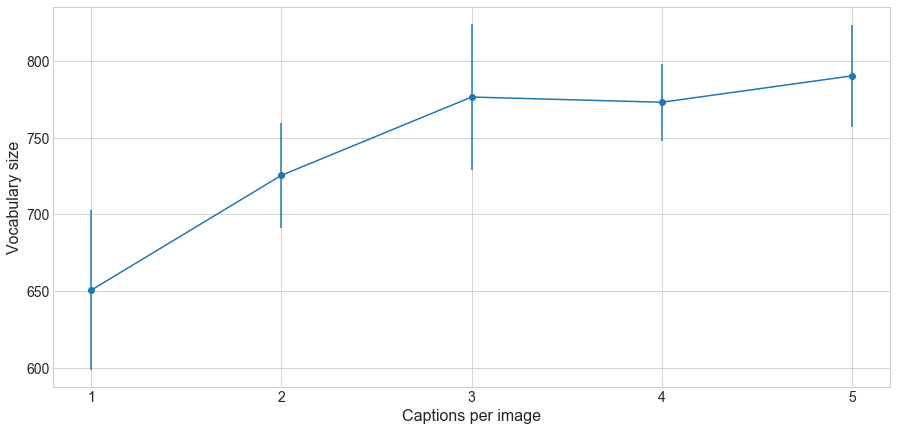

In [26]:
# plot c1-5
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x[:5], a_c1_c10_arrs[0][:5], a_c1_c10_arrs[1][:5], fmt='-o')
#plt.legend([line1, line2, line3, line4, line5, line6, line7, line8], METRICS)
#plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
#           ncol=1, borderaxespad=0.)
plt.ylabel('Vocabulary size', Fontsize=16)
plt.xlabel('Captions per image', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('a-voc-c1-5.pdf'))
plt.show()

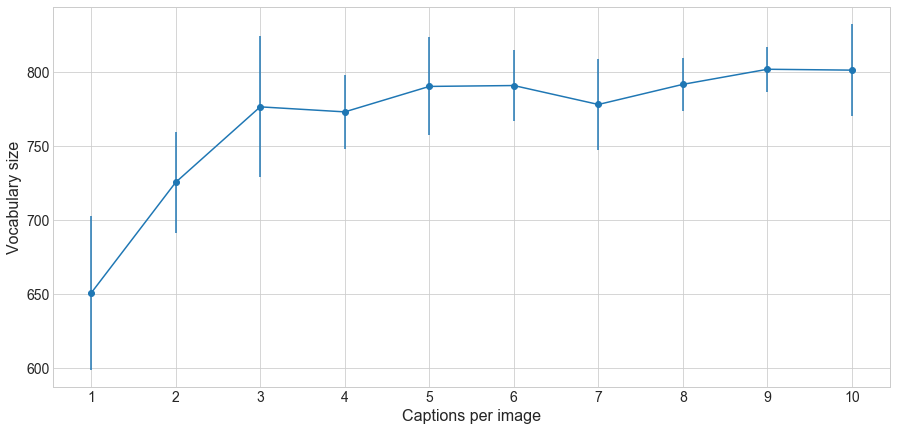

In [27]:
# plot c1-10
plt.figure(figsize=(15,7))
line1 = plt.errorbar(x, a_c1_c10_arrs[0], a_c1_c10_arrs[1], fmt='-o')
#plt.legend([line1, line2, line3, line4, line5, line6, line7, line8], METRICS)
#plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
#           ncol=1, borderaxespad=0.)
plt.ylabel('Vocabulary size', Fontsize=16)
plt.xlabel('Captions per image', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('a-voc-c1-10.pdf'))
plt.show()

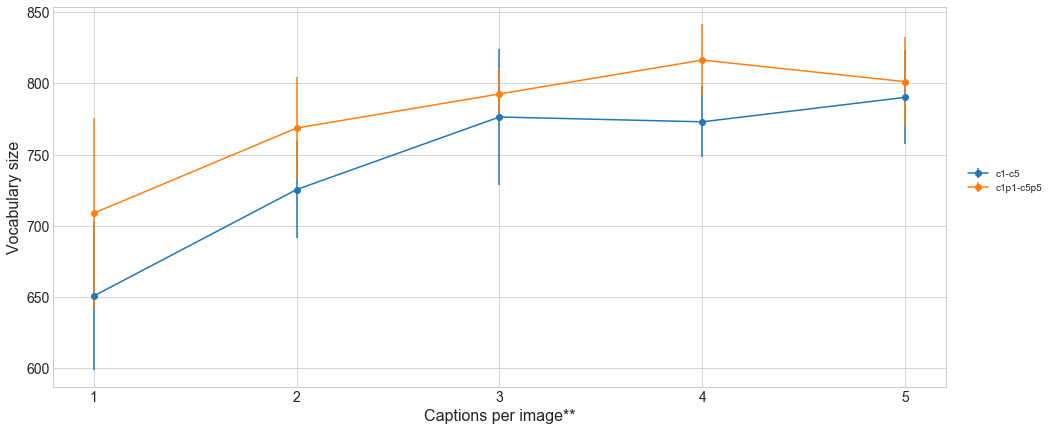

In [28]:
# plot c1-5 vs c1p1-c5p5
plt.figure(figsize=(16,7))
line1 = plt.errorbar(x[:5], a_c1_c10_arrs[0][:5], a_c1_c10_arrs[1][:5], fmt='-o', label='c1-c5')
line2 = plt.errorbar(x[:5], a_c1p1_c5p5_arrs[0], a_c1p1_c5p5_arrs[1], fmt='-o', label='c1p1-c5p5')
plt.legend([line1, line2])
plt.legend(bbox_to_anchor=(1.02, 0.5, 1., .1), loc='lower left',
           ncol=1, borderaxespad=0.)
plt.ylabel('Vocabulary size', Fontsize=16)
plt.xlabel('Captions per image**', Fontsize=16)
plt.xticks([1, 2, 3, 4, 5], Fontsize=14)
plt.yticks(Fontsize=14)
plt.savefig(save_path.joinpath('a-voc-compare.pdf'))
plt.show()

# Model B

In [10]:
b_df = pd.read_csv(basic_result_path)
b_df

,model,dataset,voc_size
0,basic_08-May-2020_(21:46:09),coco,731.0
1,basic_08-May-2020_(21:46:13),coco,766.0
2,basic_08-May-2020_(22:16:18),coco,668.0
3,basic_08-May-2020_(22:32:32),coco,746.0
4,basic_08-May-2020_(23:14:34),coco,713.0
...,...,...,...
70,basic_exp_01-May-2020_(23:51:36),c2p2,689.0
71,basic_exp_04-May-2020_(13:26:07),c2p2,696.0
72,basic_exp_06-May-2020_(14:27:54),c2p2,688.0
73,basic_exp_07-May-2020_(16:23:02),c2p2,719.0


## Baseline

In [11]:
b_baseline_df = b_df.loc[b_df.loc[:,'dataset']=='coco', :]
b_baseline_df

,model,dataset,voc_size
0,basic_08-May-2020_(21:46:09),coco,731.0
1,basic_08-May-2020_(21:46:13),coco,766.0
2,basic_08-May-2020_(22:16:18),coco,668.0
3,basic_08-May-2020_(22:32:32),coco,746.0
4,basic_08-May-2020_(23:14:34),coco,713.0


In [12]:
b_baseline_df.describe()

,voc_size
count,5.000000
mean,724.800000
std,37.251846
min,668.000000
25%,713.000000
50%,731.000000
75%,746.000000
max,766.000000
